<a href="https://www.kaggle.com/code/adharshinikumar/understanding-urban-commute-insights?scriptVersionId=256255328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚦 Understanding Urban Commute: Insights from the FlowSync Commuter Survey 2025
**Author:** Synthoria / FlowSync Project  
**Dataset:** [FlowSync Commuter Survey 2025](https://www.kaggle.com/datasets/adharshinikumar/flowsync-commuter-survey)

This notebook explores commuting patterns, travel flexibility, and incentive preferences from the FlowSync Commuter Survey 2025 dataset. It aims to uncover insights that can help urban planners, policymakers, and researchers design smarter mobility solutions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

## 1️⃣ Data Overview

In [2]:
df = pd.read_csv('/kaggle/input/commuter-survey-dataset-travel-time-and-challenges/flowsync_commuter_survey.csv')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (500, 6)


,respondent_id,route,current_commute_min,willing_to_shift,preferred_departure_slot_evening,incentive_preference
0,1,Mindspace→Gachibowli,20,Yes,4:45-5:15 PM,Yes - transport stipend
1,2,Mindspace→Kukatpally,35,Yes,5:45-6:15 PM,Yes - small (coffee/month)
2,3,Gachibowli→HITEC,45,Yes,6:45-7:15 PM,NaN
3,4,Mindspace→Gachibowli,50,Yes,5:45-6:15 PM,NaN
4,5,Mindspace→Kukatpally,40,Yes,6:15-6:45 PM,Yes - small (coffee/month)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   respondent_id                     500 non-null    int64 
 1   route                             500 non-null    object
 2   current_commute_min               500 non-null    int64 
 3   willing_to_shift                  500 non-null    object
 4   preferred_departure_slot_evening  500 non-null    object
 5   incentive_preference              300 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
respondent_id,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
route,500,6,Mindspace→Kukatpally,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_commute_min,500.0,NaN,NaN,NaN,39.01,10.592181,20.0,30.0,40.0,45.0,60.0
willing_to_shift,500,3,Yes,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preferred_departure_slot_evening,500,7,5:45-6:15 PM,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incentive_preference,300,2,Yes - small (coffee/month),199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2️⃣ Commute Duration Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


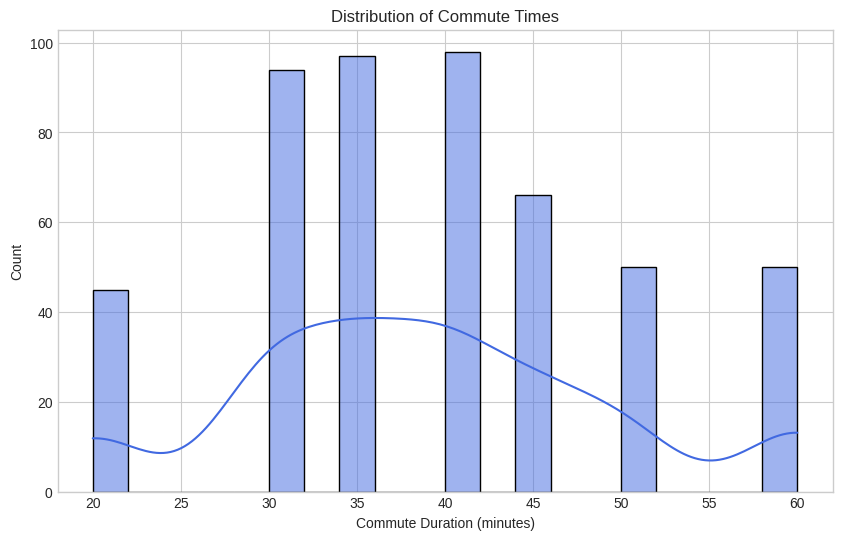

Average commute time: 39.01 mins
Median commute time: 40.0 mins


In [5]:
sns.histplot(df['current_commute_min'], bins=20, kde=True, color='royalblue')
plt.xlabel('Commute Duration (minutes)')
plt.title('Distribution of Commute Times')
plt.show()

print('Average commute time:', round(df['current_commute_min'].mean(), 2), 'mins')
print('Median commute time:', round(df['current_commute_min'].median(), 2), 'mins')

## 3️⃣ Willingness to Shift Commute

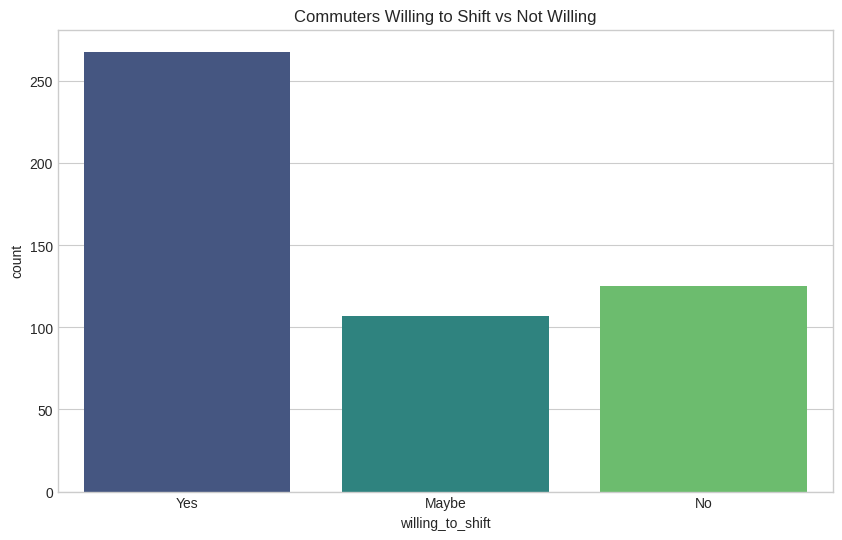

willing_to_shift
Maybe    39.439252
No       38.120000
Yes      39.253731
Name: current_commute_min, dtype: float64

In [6]:
sns.countplot(data=df, x='willing_to_shift', palette='viridis')
plt.title('Commuters Willing to Shift vs Not Willing')
plt.show()

flex_stats = df.groupby('willing_to_shift')['current_commute_min'].mean()
flex_stats

## 4️⃣ Preferred Evening Departure Slots

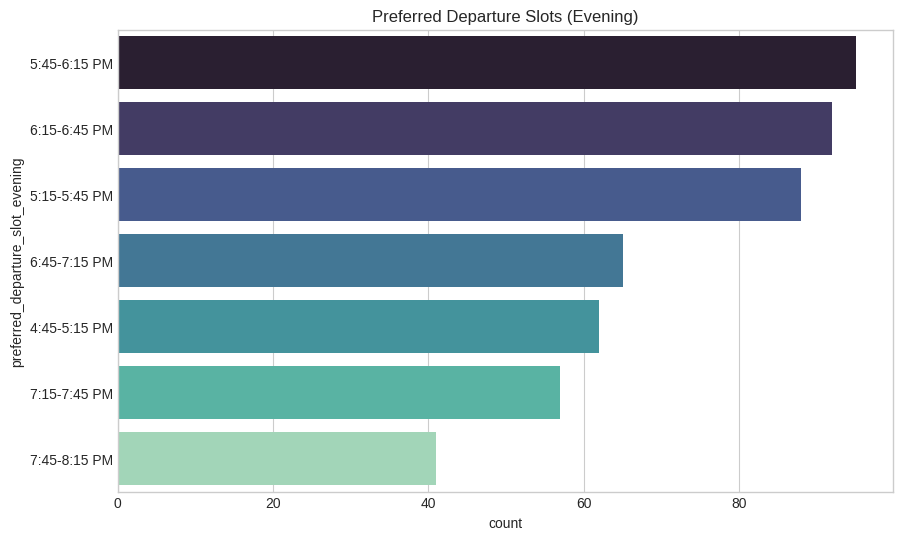

In [7]:
sns.countplot(data=df, y='preferred_departure_slot_evening', order=df['preferred_departure_slot_evening'].value_counts().index, palette='mako')
plt.title('Preferred Departure Slots (Evening)')
plt.show()

## 5️⃣ Incentive Preferences

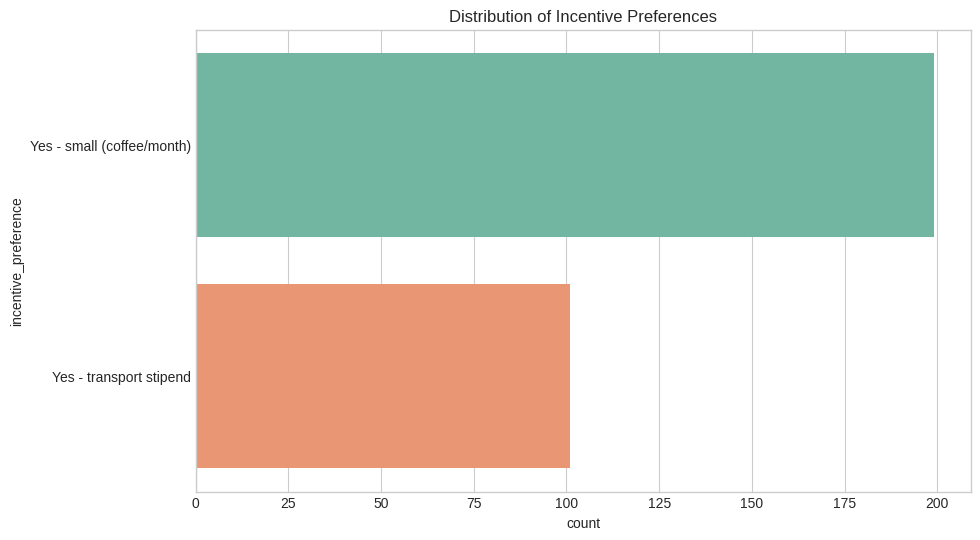

willing_to_shift,Maybe,No,Yes
incentive_preference,,,
Yes - small (coffee/month),0.211055,0.251256,0.537688
Yes - transport stipend,0.257426,0.217822,0.524752


In [8]:
sns.countplot(data=df, y='incentive_preference', order=df['incentive_preference'].value_counts().index, palette='Set2')
plt.title('Distribution of Incentive Preferences')
plt.show()

pd.crosstab(df['incentive_preference'], df['willing_to_shift'], normalize='index')

## 6️⃣ Route Analysis

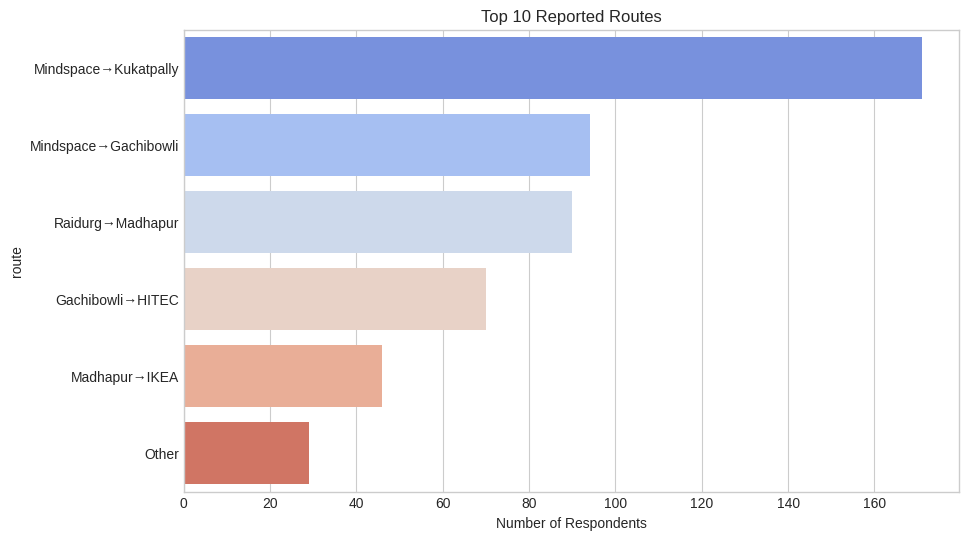

route
Mindspace→Gachibowli    40.797872
Other                   39.827586
Mindspace→Kukatpally    39.269006
Gachibowli→HITEC        38.642857
Madhapur→IKEA           37.500000
Raidurg→Madhapur        37.444444
Name: current_commute_min, dtype: float64

In [9]:
top_routes = df['route'].value_counts().head(10)
sns.barplot(x=top_routes.values, y=top_routes.index, palette='coolwarm')
plt.title('Top 10 Reported Routes')
plt.xlabel('Number of Respondents')
plt.show()

df.groupby('route')['current_commute_min'].mean().sort_values(ascending=False).head(10)

## 7️⃣ Key Insights Summary

In [10]:
print('📌 Key Insights:')
print(f"- Average commute time: {df['current_commute_min'].mean():.2f} minutes")
print(f"- Median commute time: {df['current_commute_min'].median():.2f} minutes")
print(f"- % willing to shift: {(df['willing_to_shift'].value_counts(normalize=True).get('Yes',0)*100):.1f}%")
print(f"- Most preferred incentive: {df['incentive_preference'].mode()[0]}")
print(f"- Most common evening slot: {df['preferred_departure_slot_evening'].mode()[0]}")

📌 Key Insights:
- Average commute time: 39.01 minutes
- Median commute time: 40.00 minutes
- % willing to shift: 53.6%
- Most preferred incentive: Yes - small (coffee/month)
- Most common evening slot: 5:45-6:15 PM


## 8️⃣ Future Applications
- Urban planning for staggered commute schedules
- Predictive models for commute duration and flexibility
- Designing corporate incentive schemes for flexible work hours
- Policy research for sustainable city transport
